# Lab: UAV-assisted wireless localization

_Fraida Fund_

* **Net ID**:
* **Name**:

In [1]:
!pip install bayesian-optimization==2.0.0 numpy==1.26.4 scikit_learn==1.5.2

After running the cell above, use Runtime > Restart Session from the Colab menu. Then, continue with the next cell.

In [2]:
import numpy as np
import pandas as pd
import pickle
import hashlib

from bayes_opt import BayesianOptimization, acquisition
from sklearn.gaussian_process.kernels import Matern, WhiteKernel, RBF

import geopy.distance

import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d
from ipywidgets import interact, fixed, widgets
from mpl_toolkits import mplot3d
from IPython.core.interactiveshell import InteractiveShell
plt.rcParams['axes.formatter.useoffset'] = False

In [3]:
!git clone https://github.com/teaching-on-testbeds/uav-wireless-localization uav_wireless_localization

fatal: destination path 'uav_wireless_localization' already exists and is not an empty directory.


In [4]:
from uav_wireless_localization.uav_utils import *

Use the file browser in Google Colab to upload rover search CSV files and pickled optimizer files to Colab.

## Analyze experiment results from "default" experiment

Once you have uploaded `ROVER_SEARCH_DATA_default.csv` and `opt_final_default.pickle` to Colab, we can analyze the results of this "baseline" experiment.

In [21]:
true_lat_default = 35.729
true_lon_default = -78.699

In [22]:
df_results_default = pd.read_csv('ROVER_SEARCH_DATA_default.csv')
with open('opt_final_default.pickle', 'rb') as handle:
    optimizer_default = pickle.load(handle)

then plot with

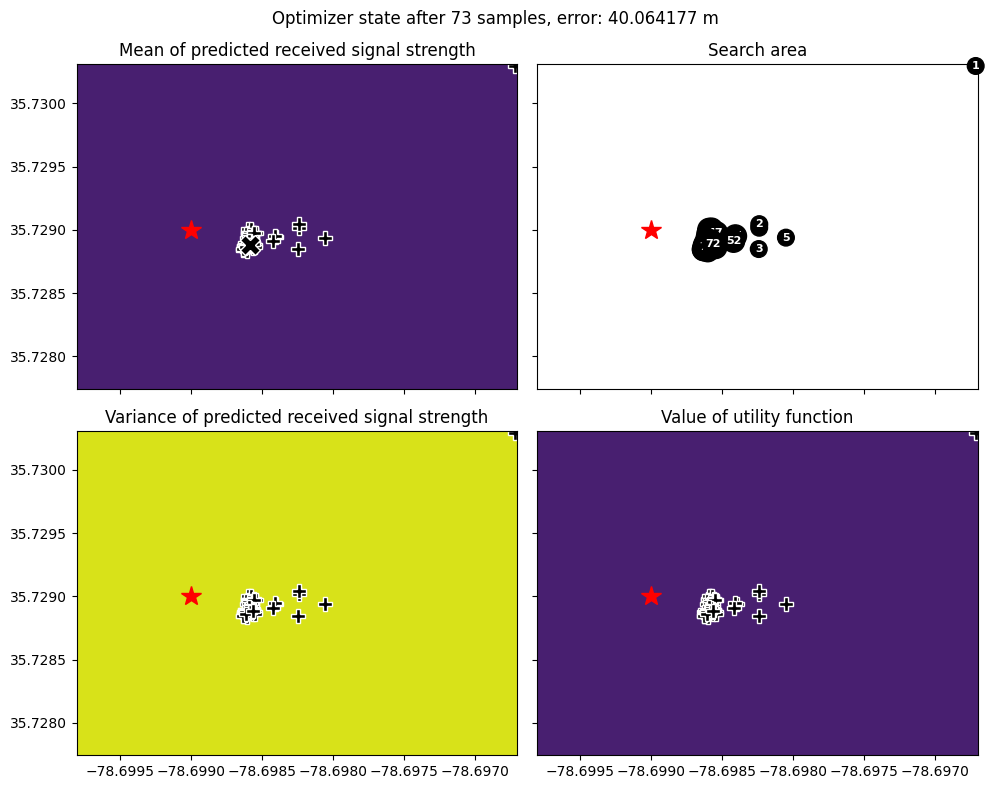

In [23]:
vis_optimizer(optimizer_default, true_lat_default, true_lon_default)

In [24]:
def plot_3D_with_opt(elev, azim):
    plot_3D(optimizer_default, elev, azim)

interact(plot_3D_with_opt, elev=widgets.IntSlider(min=-90, max=90, step=10, value=20),
          azim=widgets.IntSlider(min=-90, max=90, step=10, value=-70));


interactive(children=(IntSlider(value=20, description='elev', max=90, min=-90, step=10), IntSlider(value=-70, …

and look at the estimation error vs time with:

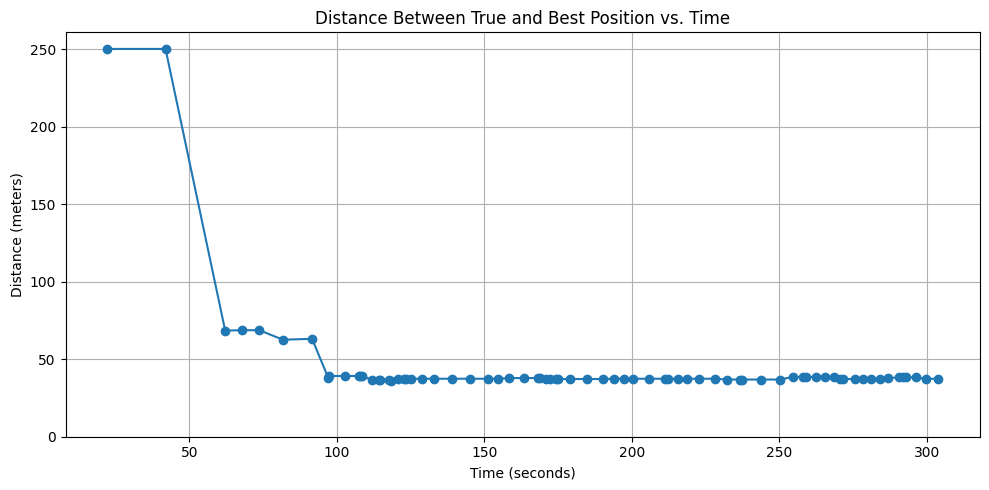

In [25]:
plot_position_error_over_time(df_results_default, true_lat_default, true_lon_default)

Also note the fitted kernel parameters of the final model -

In [26]:
kernel_default = optimizer_default._gp.kernel_.get_params()
kernel_default

{'length_scale': 9.999999999999997e-06,
 'length_scale_bounds': (1e-05, 100000.0)}

## Analyze results from rover search with new location

You will run this experiment for a different starting position of the ground vehicle (i.e. the hikers). To generate the new start position, you will put your net ID in the relevant line of the following cell, un-comment the cell, and then run it.

In [27]:
netID = "zl2946"  # Replace with your netID

hash_object = hashlib.md5(netID.encode())
seed = int(hash_object.hexdigest(), 16) % (2**32)
np.random.seed(seed)
print(seed)

BOUND_NE={'lat':35.73030799378120, 'lon':-78.69670002283071}
BOUND_NW={'lat':35.73030799378120, 'lon':-78.69980159100491}
BOUND_SE={'lat':35.72774492720433, 'lon':-78.69670002283071}
BOUND_SW={'lat':35.72774492720433, 'lon':-78.69980159100491}

true_lat_new = np.random.uniform(BOUND_SE['lat'], BOUND_NE['lat'])
true_lon_new = np.random.uniform(BOUND_SE['lon'], BOUND_SW['lon'])
print(true_lat_new, true_lon_new)

3665147296
35.72918529983678 -78.69970672884678


After you have run the experiment with the new location, and uploaded your data:

In [28]:
df_results_new = pd.read_csv('ROVER_SEARCH_DATA_new.csv')
with open('opt_final_new.pickle', 'rb') as handle:
    optimizer_new = pickle.load(handle)

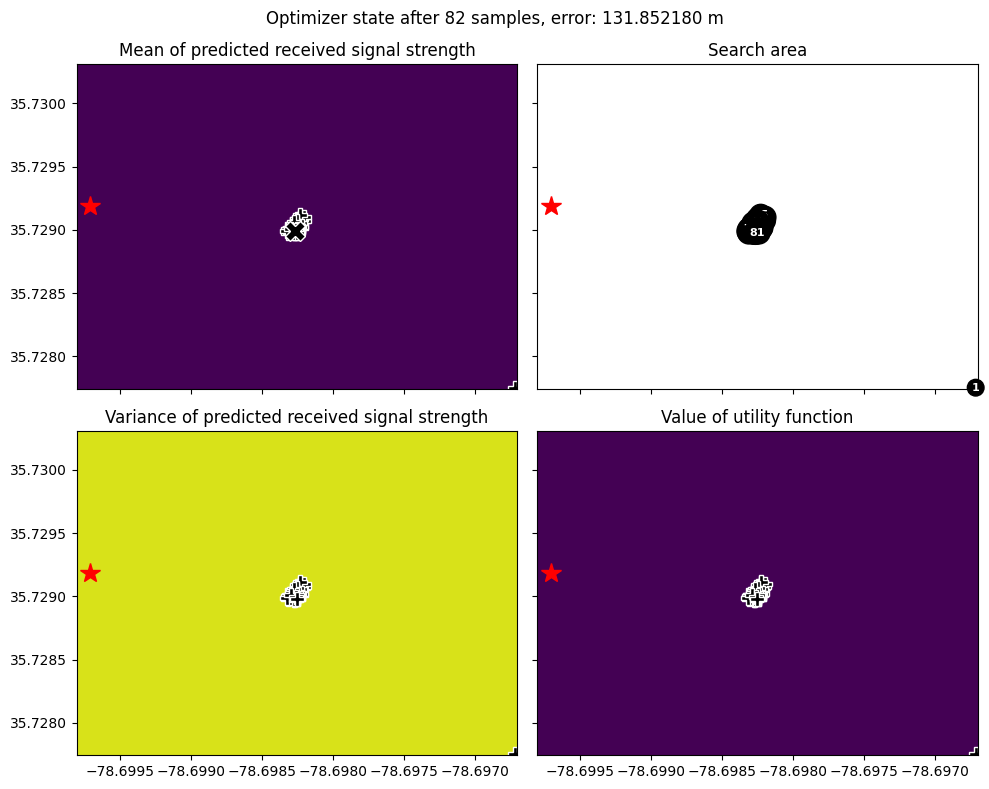

In [29]:
vis_optimizer(optimizer_new, true_lat_new, true_lon_new)

In [30]:
def plot_3D_with_opt(elev, azim):
    plot_3D(optimizer_new, elev, azim)

interact(plot_3D_with_opt, elev=widgets.IntSlider(min=-90, max=90, step=10, value=20),
          azim=widgets.IntSlider(min=-90, max=90, step=10, value=-70));


interactive(children=(IntSlider(value=20, description='elev', max=90, min=-90, step=10), IntSlider(value=-70, …

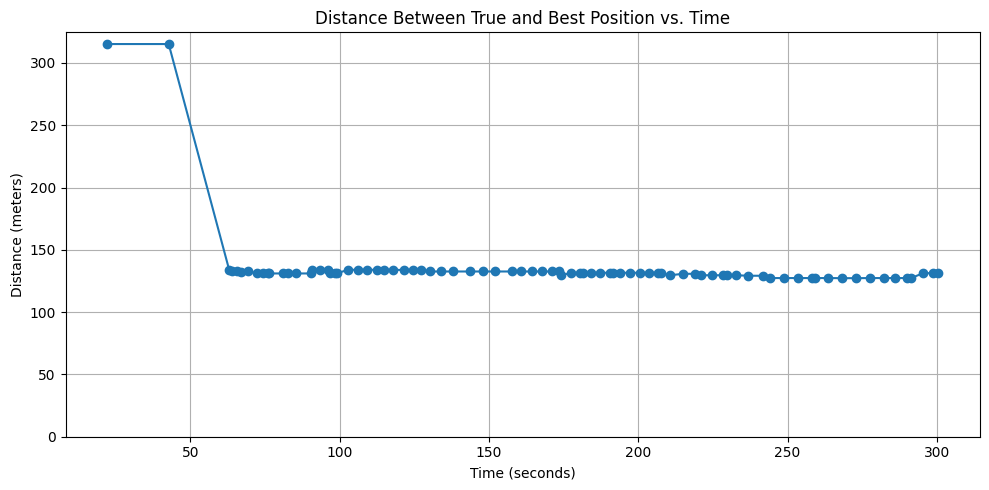

In [31]:
plot_position_error_over_time(df_results_new, true_lat_new, true_lon_new)

In [36]:
kernel_new = optimizer_new._gp.kernel_.get_params()
kernel_new

{'length_scale': 9.999999999999997e-06,
 'length_scale_bounds': (1e-05, 100000.0)}

## Analyze results from rover search with custom model

In [47]:
df_results_custom = pd.read_csv('ROVER_SEARCH_DATA_custom.csv')
with open('opt_final_custom.pickle', 'rb') as handle:
    optimizer_custom = pickle.load(handle)

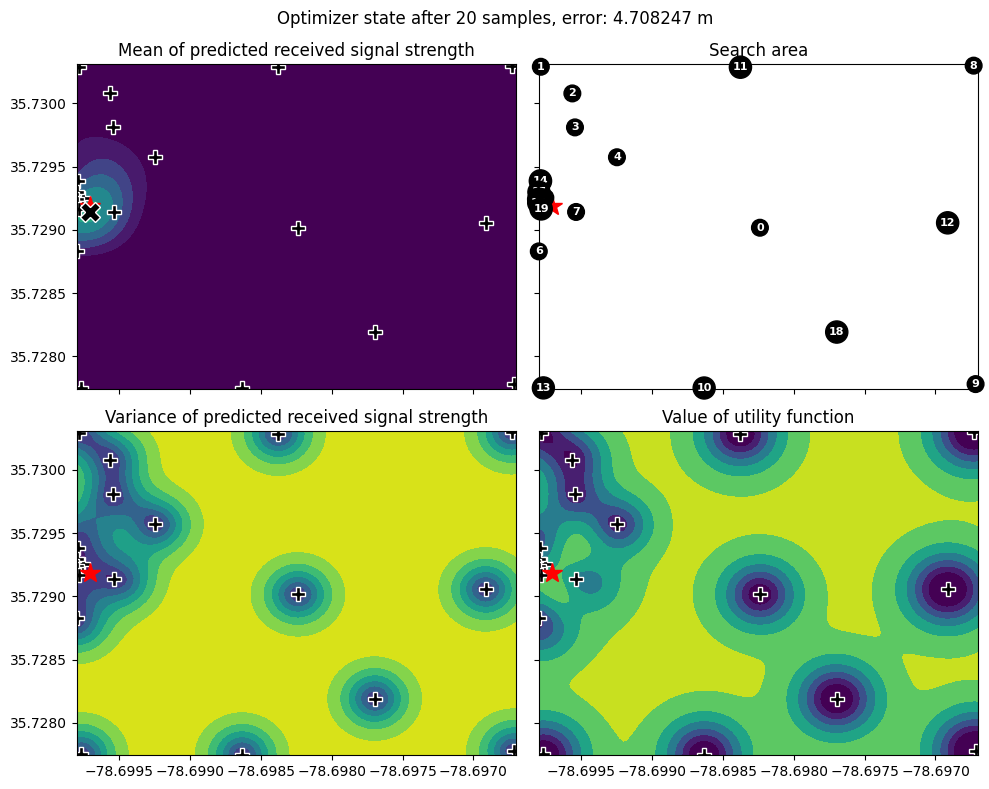

In [48]:
vis_optimizer(optimizer_custom, true_lat_new, true_lon_new)

In [49]:
def plot_3D_with_opt(elev, azim):
    plot_3D(optimizer_custom, elev, azim)

interact(plot_3D_with_opt, elev=widgets.IntSlider(min=-90, max=90, step=10, value=20),
          azim=widgets.IntSlider(min=-90, max=90, step=10, value=-70));


interactive(children=(IntSlider(value=20, description='elev', max=90, min=-90, step=10), IntSlider(value=-70, …

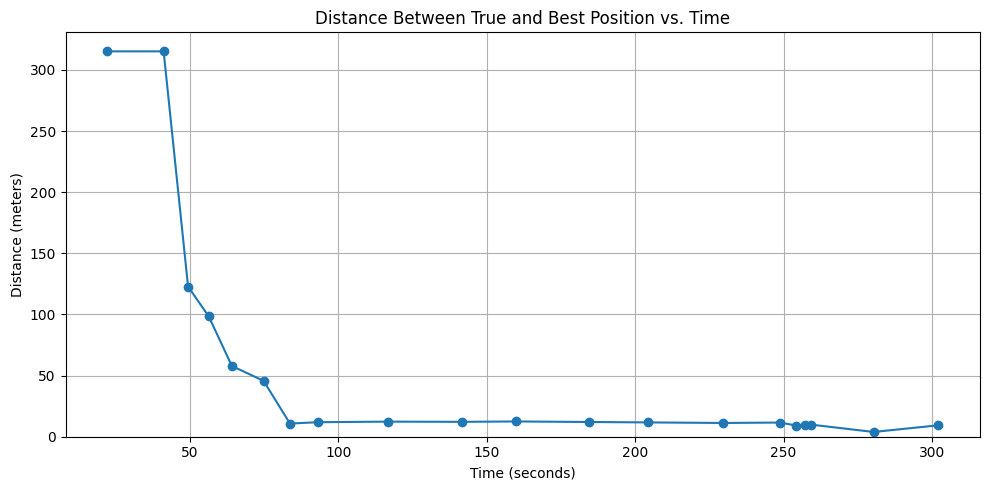

In [50]:
plot_position_error_over_time(df_results_custom, true_lat_new, true_lon_new)

In [51]:
kernel_custom = optimizer_custom._gp.kernel_.get_params()
kernel_custom

{'k1': RBF(length_scale=0.000257),
 'k2': WhiteKernel(noise_level=0.00539),
 'k1__length_scale': 0.00025679919309995263,
 'k1__length_scale_bounds': (0.0001, 10.0),
 'k2__noise_level': 0.005392496025205858,
 'k2__noise_level_bounds': (1e-05, 2.0)}

Verify that you have met the specific requirements. Then, comment on the results, specifically:

* what changes did you make do the default settings of the optimizer and model?
* how has the appearance of the fitted model changed from the previous experiment, and why?
* what change do you see in the fitted model kernel parameters?

Write your answers in the cell below.

I add something in the RBF kernel. First I set kappa to 30 because when everything is in defult, the UAV just stay there forever. Also added bounds length_scale_bounds=(1e-2, 1e2) and noise_level_bounds=(1e-5, 1e1) from earlier labs. But then I find that the 3d graph is still flat and when the UAV on QGroundcontrol fly counter to counter and just pass the beacon like it was nothing there. Also the length scale was 0.01 and the noise_level was around 1. So kappa is to large and bounds forced extremes. Then lower kappa to defult, 2.5, also change the bound to length_scale_bounds=(1e-4, 10), noise_level_bounds=(1e-5, 2.0).


In earlier experiments, the predicted signal strength surface is flat. With high error that is larger than 100m. after changing kernel bounds and lowering kappa the firred model can find the beacon and work around it. Explor other places not only stay around the beacon.


In the fitted model, length_scale is around 0.00026. It can tell the small difference in signal in short distance. noise_level is around 0.0054 showing that the model found the measurement is clean and consistent.